In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("placement.csv")
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


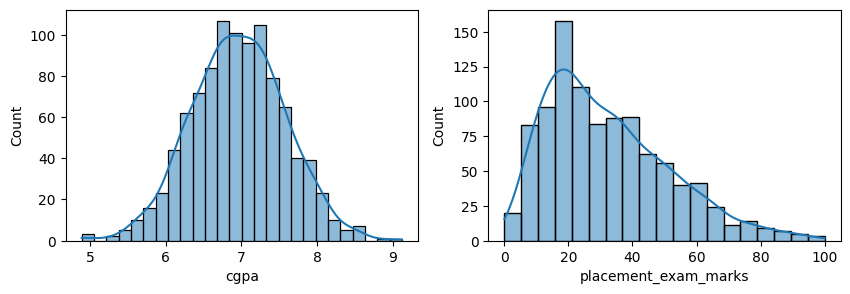

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

sns.histplot(df["cgpa"], kde=True, ax=ax1)
sns.histplot(df["placement_exam_marks"], kde=True, ax=ax2)

plt.show()

In [31]:
print(df["cgpa"].skew(), df["placement_exam_marks"].skew())

-0.014529938929314918 0.8356419499466834


#### Here placement_exam_marks is the skewed one. So will apply IQR method on this

In [32]:
df["placement_exam_marks"].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

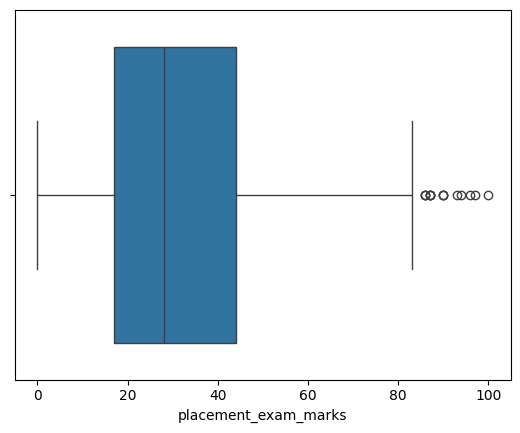

In [33]:
sns.boxplot(data=df, x="placement_exam_marks")

### Finding the IQR

In [34]:
percentile25 = df["placement_exam_marks"].quantile(0.25)
percentile75 = df["placement_exam_marks"].quantile(0.75)

In [35]:
print(percentile25, percentile75)

17.0 44.0


In [36]:
iqr = percentile75 - percentile25
print(iqr)

27.0


#### Now we will calculate the maximum(upper limit) and minimum(lower limit)
<img src="../images/image9.png" width=400></br>

In [37]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

print(lower_limit, upper_limit)

-23.5 84.5


### Finding Outliers

In [38]:
df[df["placement_exam_marks"] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [39]:
df[df["placement_exam_marks"] < lower_limit]

,cgpa,placement_exam_marks,placed


### Now Trimming

In [52]:
new_df_trimmed = df[df["placement_exam_marks"] < upper_limit]
new_df_trimmed

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


#### Comparing

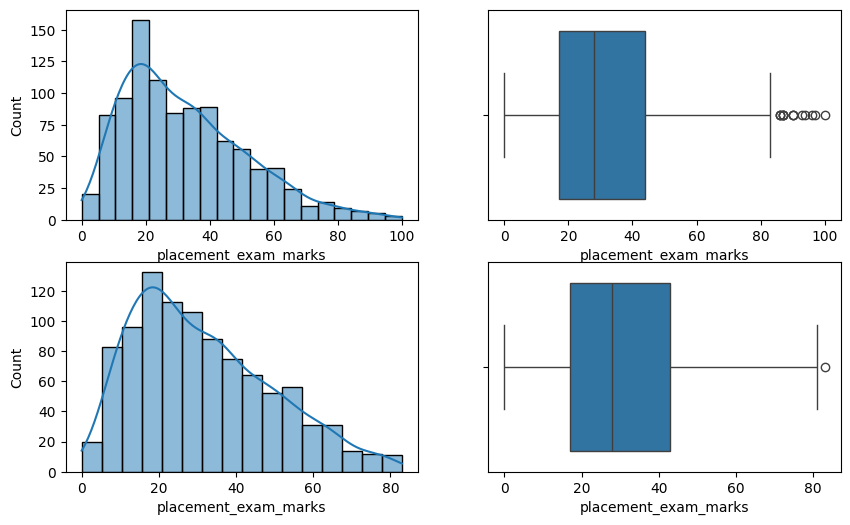

In [53]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 6))

sns.histplot(df["placement_exam_marks"], kde=True, ax=axes[0, 0])
sns.boxplot(data=df, x="placement_exam_marks", ax=axes[0, 1])

sns.histplot(new_df_trimmed["placement_exam_marks"], kde=True, ax=axes[1, 0])
sns.boxplot(data=new_df_trimmed, x="placement_exam_marks", ax=axes[1, 1])

plt.show()

### Capping

In [54]:
new_df_cap = df.copy()

In [55]:
new_df_cap["placement_exam_marks"] = np.where(
    new_df_cap["placement_exam_marks"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap["placement_exam_marks"] < lower_limit,
        lower_limit,
        new_df_cap["placement_exam_marks"]
    )
)

In [56]:
new_df_cap.shape

(1000, 3)

#### Comparing

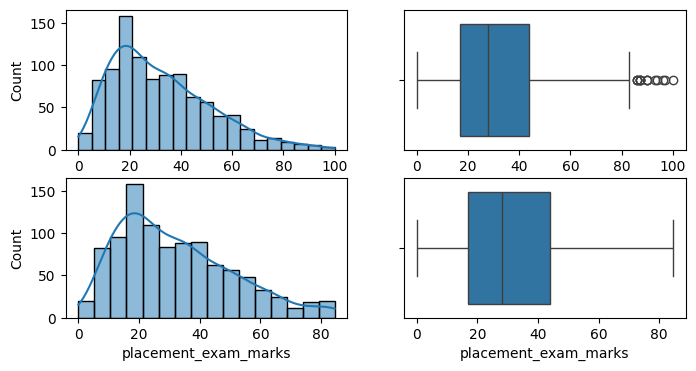

In [60]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 4))

sns.histplot(df["placement_exam_marks"], kde=True, ax=axes[0, 0])
sns.boxplot(data=df, x="placement_exam_marks", ax=axes[0, 1])

sns.histplot(new_df_cap["placement_exam_marks"], kde=True, ax=axes[1, 0])
sns.boxplot(data=new_df_cap, x="placement_exam_marks", ax=axes[1, 1])

plt.show()